In [1]:
import matplotlib.pyplot as plt
from model_set import Summarize
import numpy as np
from rouge_score import rouge_scorer
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import PreTrainedTokenizerFast, BartModel

- 본문기사 : https://biz.heraldcorp.com/view.php?ud=20231130000417

# BERTShared

In [2]:
def calculate_rouge_score(original_text):
    # BERTShared 모델을 사용하여 요약 생성
    summarizer = Summarize('kykim/bertshared-kor-base', 'kykim/bertshared-kor-base')
    generated_summary = summarizer(original_text)

    # ROUGE 스코어 계산
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(original_text, generated_summary)

    # ROUGE 스코어 반환
    rouge_scores = {}
    for metric, score in scores.items():
        rouge_scores[metric] = {
            'precision': score.precision,
            'recall': score.recall,
            'fmeasure': score.fmeasure
        }

    return generated_summary, rouge_scores

# KoBART

In [3]:
def summarize_and_evaluate(original_text):
    # KoBART 모델을 사용하여 요약 생성
    model_name = 'hyunwoongko/kobart'
    tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    # 요약 생성
    inputs = tokenizer(original_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], num_beams=4, min_length=30, max_length=128, early_stopping=True)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # ROUGE 스코어 계산
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(original_text, generated_summary)

    # ROUGE 스코어 반환
    rouge_scores = {}
    for metric, score in scores.items():
        rouge_scores[metric] = {
            'precision': score.precision,
            'recall': score.recall,
            'fmeasure': score.fmeasure
        }

    return generated_summary, rouge_scores

## BERTShared 요약

In [4]:
# BERTShared 모델의 ROUGE 스코어 계산
original_text_bert = '''[헤럴드경제=이세진 기자] 경찰이 초과근무수당 지급 예산 조기 소진을 이유로 연말 초과근무 자제 방침을 내려 치안공백 우려 논란에 직면한 가운데, 경찰이 내년도 초과근무예산을 올해보다 843억원 증액하는 방안을 추진하고 있는 것으로 30일 확인됐다. 올해 잇따른 ‘묻지마’ 범죄, 자연재해 등으로 치안 수요가 급증한 만큼 내년도 초과근무 예산 증액으로 이에 적극 대응하겠다는 설명이다. 경찰청은 증액된 정부안 통과를 긍정적으로 전망하면서 올해 같은 초과근무수당 예산 부족 사태가 재발하지 않을 것으로 기대하고 있다.

헤럴드경제가 이날 입수한 ‘11·12월 근무혁신 강화계획 관련 화상회의’(지난 24일) 자료에 따르면 경찰은 2024년 경찰 초과근무수당 예산안으로 올해보다 6.4%, 843억원 증액된 예산이 정부안에 반영돼 있다고 밝히고 있다.

경찰은 이달 초 각 시·도 경찰청과 부속기관에 초과·자원근무를 최소화하라는 내용의 ‘근무혁신 강화계획’을 하달했다. 이 같은 ‘초과근무 자제령’이 치안 공백을 초래할 수 있다는 비판에 직면하자 경찰이 지난 24일 관련 대책을 논의하기 위해 연 화상회의에서 “내년도 예산안 증액 확보로 같은 사태 발생을 방지할 수 있다”며 논란을 진화하고 나선 것이다.

앞서 올해는 흉기난동 범죄로 인한 특별치안활동, 오송 참사와 잼버리 사태 등으로 인한'''
generated_summary_bert, rouge_scores_bert = calculate_rouge_score(original_text_bert)

print("Generated Summary:", generated_summary_bert)
print("ROUGE Scores:", rouge_scores_bert)

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


Generated Summary: 올해 잇따른 묻지마 범죄, 자연재해 등으로 치안 수요가 급증한 가운데 경찰이 초과근무수당 지급 예산 조기 소진을 이유로 올해보다 6. 4 %, 843억원 증액된 예산을 정부안에 반영하는 방안을 추진하고 있는 것으로 30일 확인됐다.
ROUGE Scores: {'rouge1': {'precision': 1.0, 'recall': 0.4, 'fmeasure': 0.5714285714285715}, 'rouge2': {'precision': 1.0, 'recall': 0.3333333333333333, 'fmeasure': 0.5}, 'rougeL': {'precision': 0.75, 'recall': 0.3, 'fmeasure': 0.4285714285714285}}


## KoBART 요약

In [5]:
# KoBART 모델의 ROUGE 스코어 계산
original_text_kobart = '''[헤럴드경제=이세진 기자] 경찰이 초과근무수당 지급 예산 조기 소진을 이유로 연말 초과근무 자제 방침을 내려 치안공백 우려 논란에 직면한 가운데, 경찰이 내년도 초과근무예산을 올해보다 843억원 증액하는 방안을 추진하고 있는 것으로 30일 확인됐다. 올해 잇따른 ‘묻지마’ 범죄, 자연재해 등으로 치안 수요가 급증한 만큼 내년도 초과근무 예산 증액으로 이에 적극 대응하겠다는 설명이다. 경찰청은 증액된 정부안 통과를 긍정적으로 전망하면서 올해 같은 초과근무수당 예산 부족 사태가 재발하지 않을 것으로 기대하고 있다.

헤럴드경제가 이날 입수한 ‘11·12월 근무혁신 강화계획 관련 화상회의’(지난 24일) 자료에 따르면 경찰은 2024년 경찰 초과근무수당 예산안으로 올해보다 6.4%, 843억원 증액된 예산이 정부안에 반영돼 있다고 밝히고 있다.

경찰은 이달 초 각 시·도 경찰청과 부속기관에 초과·자원근무를 최소화하라는 내용의 ‘근무혁신 강화계획’을 하달했다. 이 같은 ‘초과근무 자제령’이 치안 공백을 초래할 수 있다는 비판에 직면하자 경찰이 지난 24일 관련 대책을 논의하기 위해 연 화상회의에서 “내년도 예산안 증액 확보로 같은 사태 발생을 방지할 수 있다”며 논란을 진화하고 나선 것이다.

앞서 올해는 흉기난동 범죄로 인한 특별치안활동, 오송 참사와 잼버리 사태 등으로 인한'''
generated_summary_kobart, rouge_scores_kobart = summarize_and_evaluate(original_text_kobart)

print("Generated Summary:", generated_summary_kobart)
print("ROUGE Scores:", rouge_scores_kobart)

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


Generated Summary: 
 [헤럴드경제=이세진 기자] 경찰이 초과근무수당 지급 예산 조기 소진을 이유로 연말 초과근무 자제 방침을 내려 치안공백 우려 논란에 직면한 가운데, 경찰이 내년도 초과근무예산을 올해보다 843억원 증액하는 방안을 추진하고 있는 것으로 30일 확인됐다. 올해 잇따른 ‘묻지마’ 범죄, 자연재해 등으로 치안 수요가 급증한 만큼 내년도 초과근무 예산 증액으로 이에 적극 대응하겠다는 설명이다. 경찰청은 증액된 정부안 통과를 긍정적으로 전망하면서 올해 같은 초과근무수당 예산 부족 사태가 재발하지 않을 것으로 기대하고 있다.

헤럴드경제가 이날 입수한 ‘11·
ROUGE Scores: {'rouge1': {'precision': 1.0, 'recall': 0.3, 'fmeasure': 0.4615384615384615}, 'rouge2': {'precision': 1.0, 'recall': 0.2222222222222222, 'fmeasure': 0.3636363636363636}, 'rougeL': {'precision': 1.0, 'recall': 0.3, 'fmeasure': 0.4615384615384615}}


## BERTShared vs KoBART 비교 시각화

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ghdtm/OneDrive/바탕 화면/project/BERTShared vs KoBART.png'

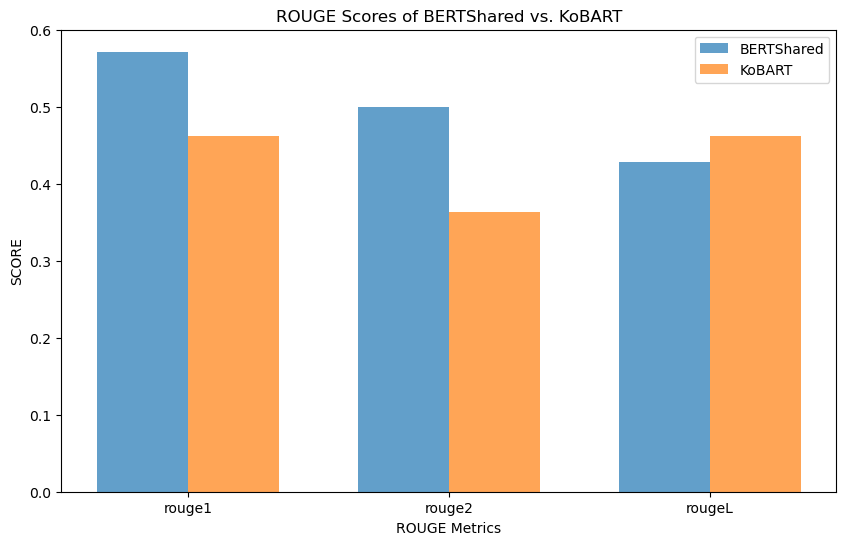

In [6]:
def plot_fmeasure_scores(rouge_scores1, rouge_scores2):
    metrics = ['rouge1', 'rouge2', 'rougeL']
    fmeasure_scores_bert = [rouge_scores1[metric]['fmeasure'] for metric in metrics]
    fmeasure_scores_kobart = [rouge_scores2[metric]['fmeasure'] for metric in metrics]

    bar_width = 0.35
    index = np.arange(len(metrics))

    plt.figure(figsize=(10, 6))

    plt.bar(index, fmeasure_scores_bert, bar_width, alpha=0.7, label='BERTShared')
    plt.bar(index + bar_width, fmeasure_scores_kobart, bar_width, alpha=0.7, label='KoBART')

    plt.xlabel('ROUGE Metrics')
    plt.ylabel('SCORE')
    plt.title('ROUGE Scores of BERTShared vs. KoBART')
    plt.xticks(index + bar_width / 2, metrics)
    plt.legend()
    plt.savefig('C:/Users/ghdtm/OneDrive/바탕 화면/project/BERTShared vs KoBART.png')
    plt.show()

# 시각화 함수 호출
plot_fmeasure_scores(rouge_scores_bert, rouge_scores_kobart)

- ROUGE-1
    - 단어 하나하나를 비교
    - 요약이 있으면, 원본 글과 얼마나 많은 단어가 겹치는지 보여줌

- ROUGE-2
    - 두 단어씩 묶어서 비교
    - 두 단어씩 묶어서 얼마나 많이 겹치는지를 측정
        -  "고양이가 매트 위에 있다"와 "고양이가 매트 위에서 놀고 있다"를 비교
        
- ROUGE-L
    - 문장의 구조를 고려
    - 긴 공통된 문장 구조가 있는지 보여줌
    - 단어가 아니라 문장의 모양이 얼마나 비슷한지를 보는것
